# 235. Lowest Common Ancestor of a Binary Search Tree

### Difficulty: <font color = orange> Medium </font>

---

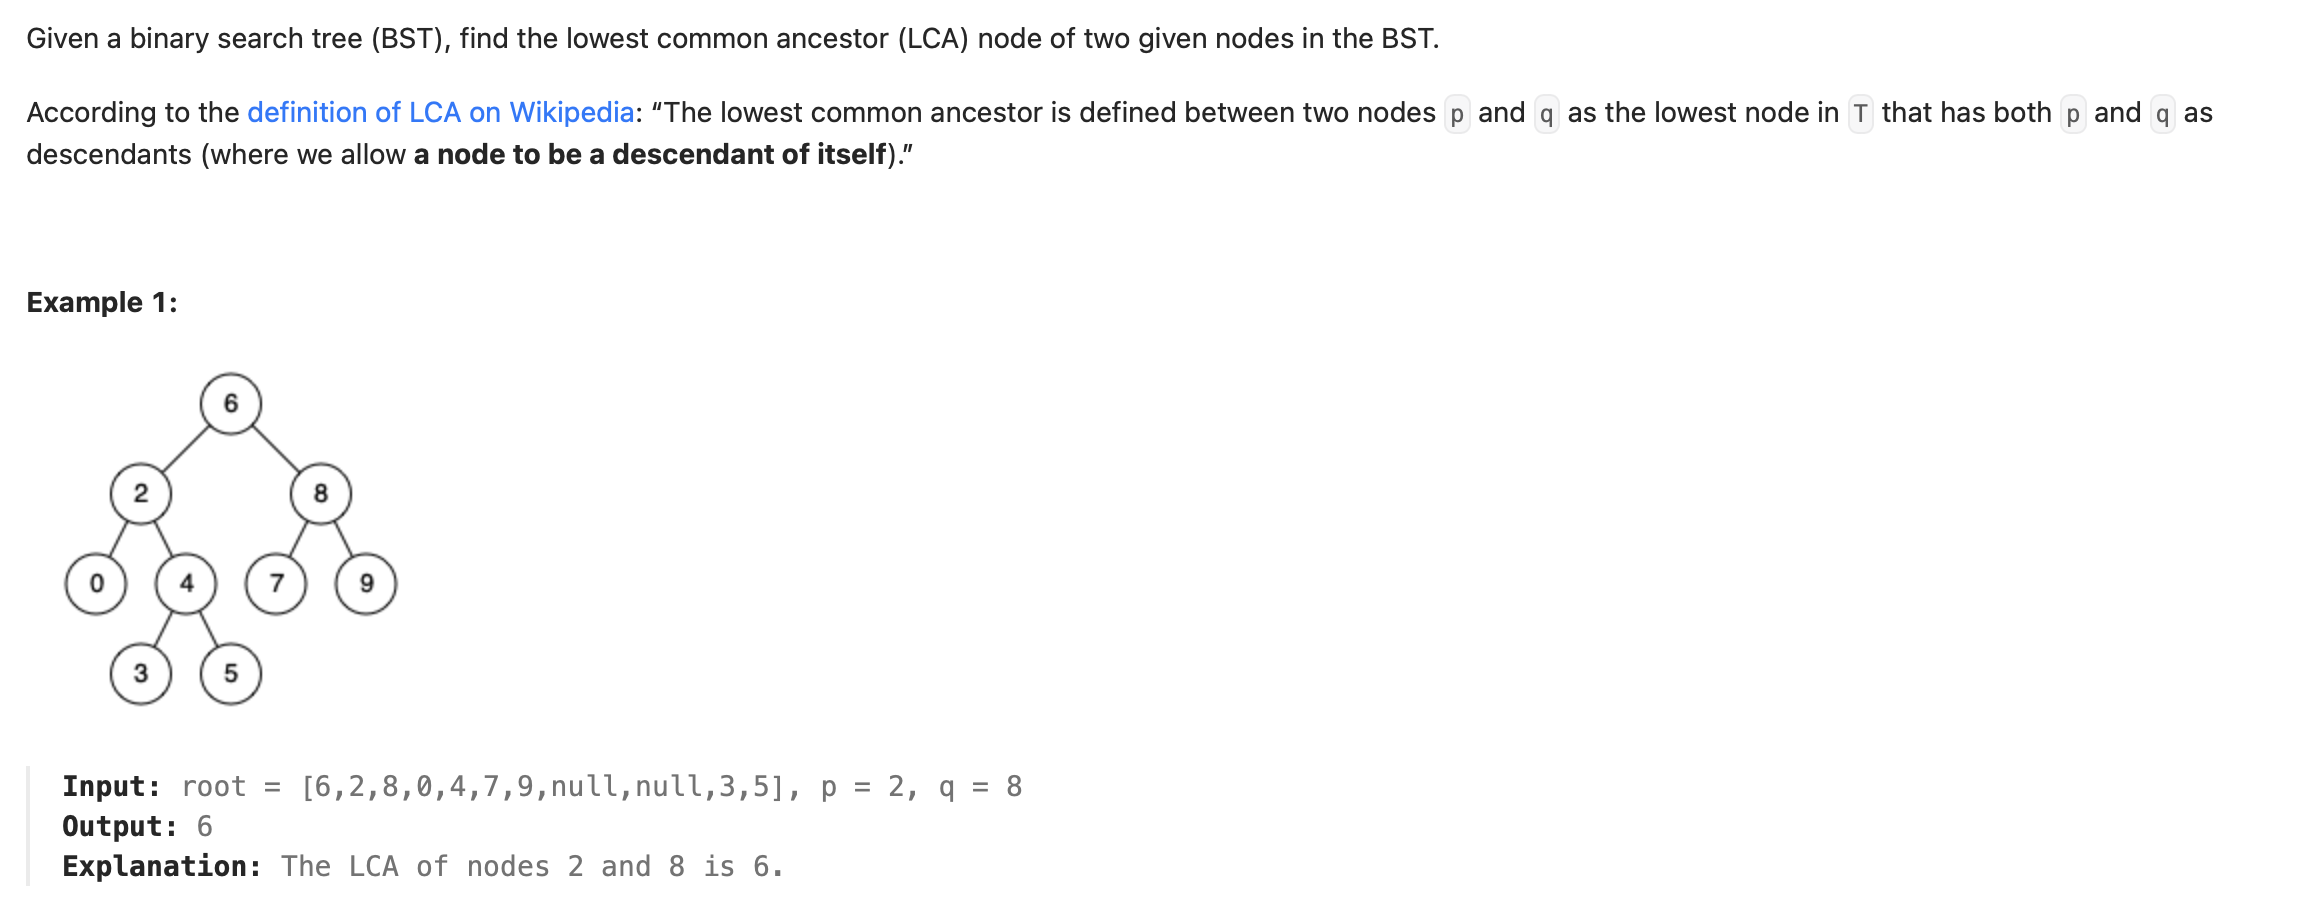

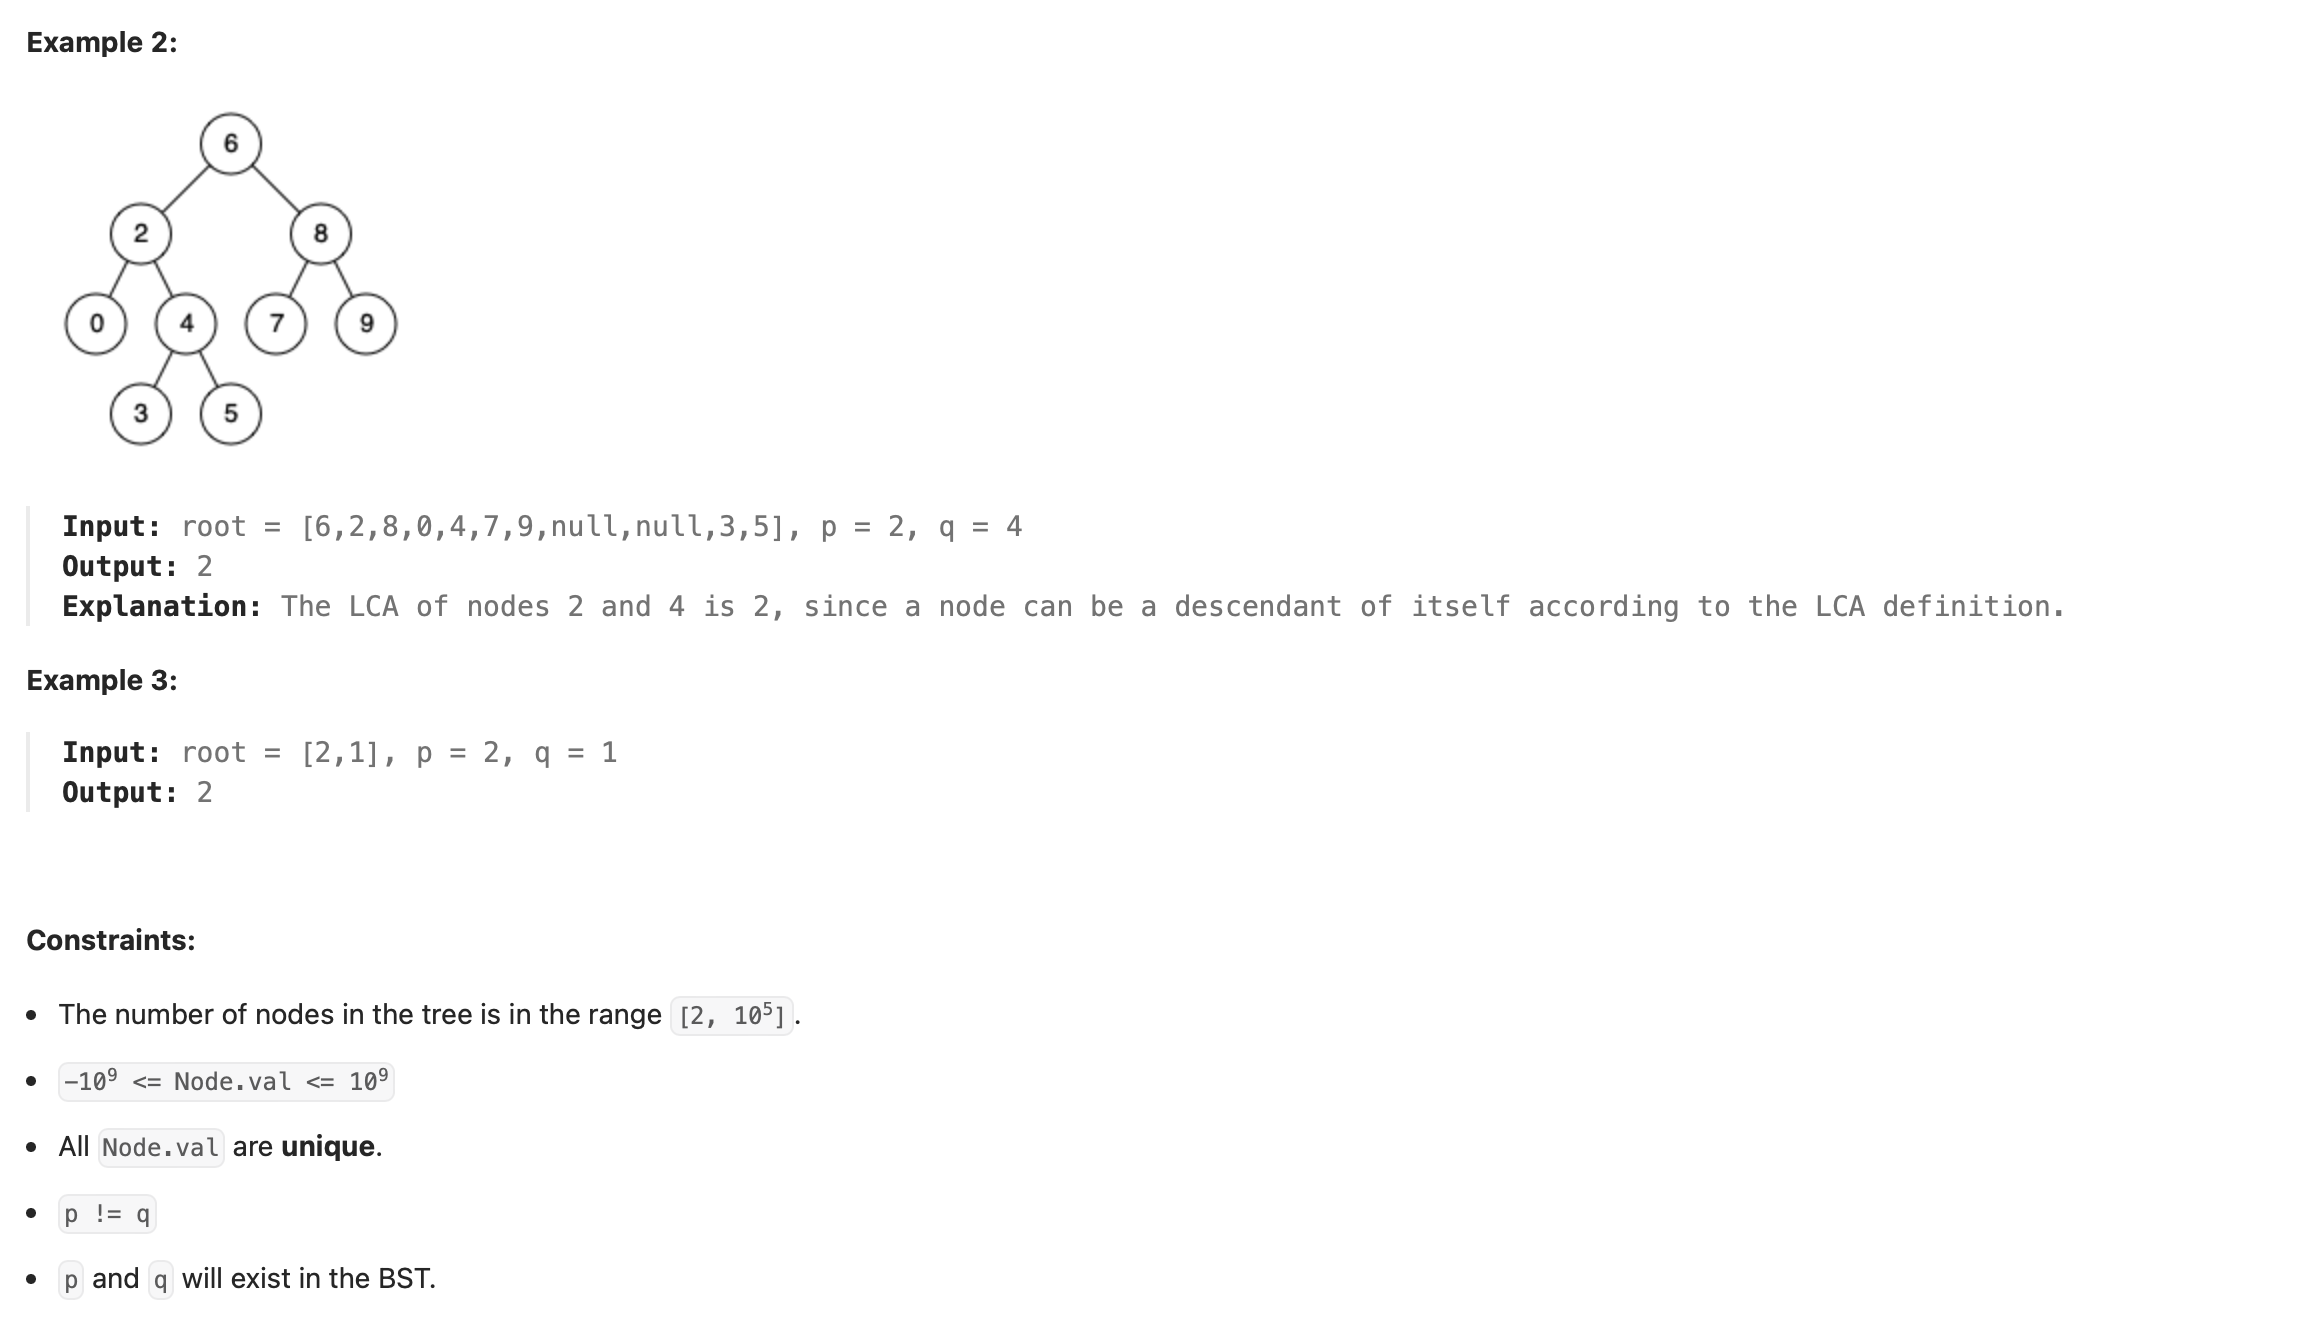

## Approach Overview:

Traverse the **BST** and for each node we visit check if they are the LCA (if they lie within the `p` and `q` value range), else pivot to either the left child of the current node or the right child until we eventually find the LCA.

GPT explaination:

Traverse the **BST**, and at each node, check if it is the `LCA` by determining if its value lies between `p` and `q`. If not, move to either the left or right child depending on whether both `p` and `q` are smaller or larger than the current node, respectively, until the `LCA` is found.


## Detailed Explanation:

This problem was very tricky. The key insight here is realizing the **LCA** is the node whose value lies between `p` and `q`. Once we find such a node, we know it is the LCA.

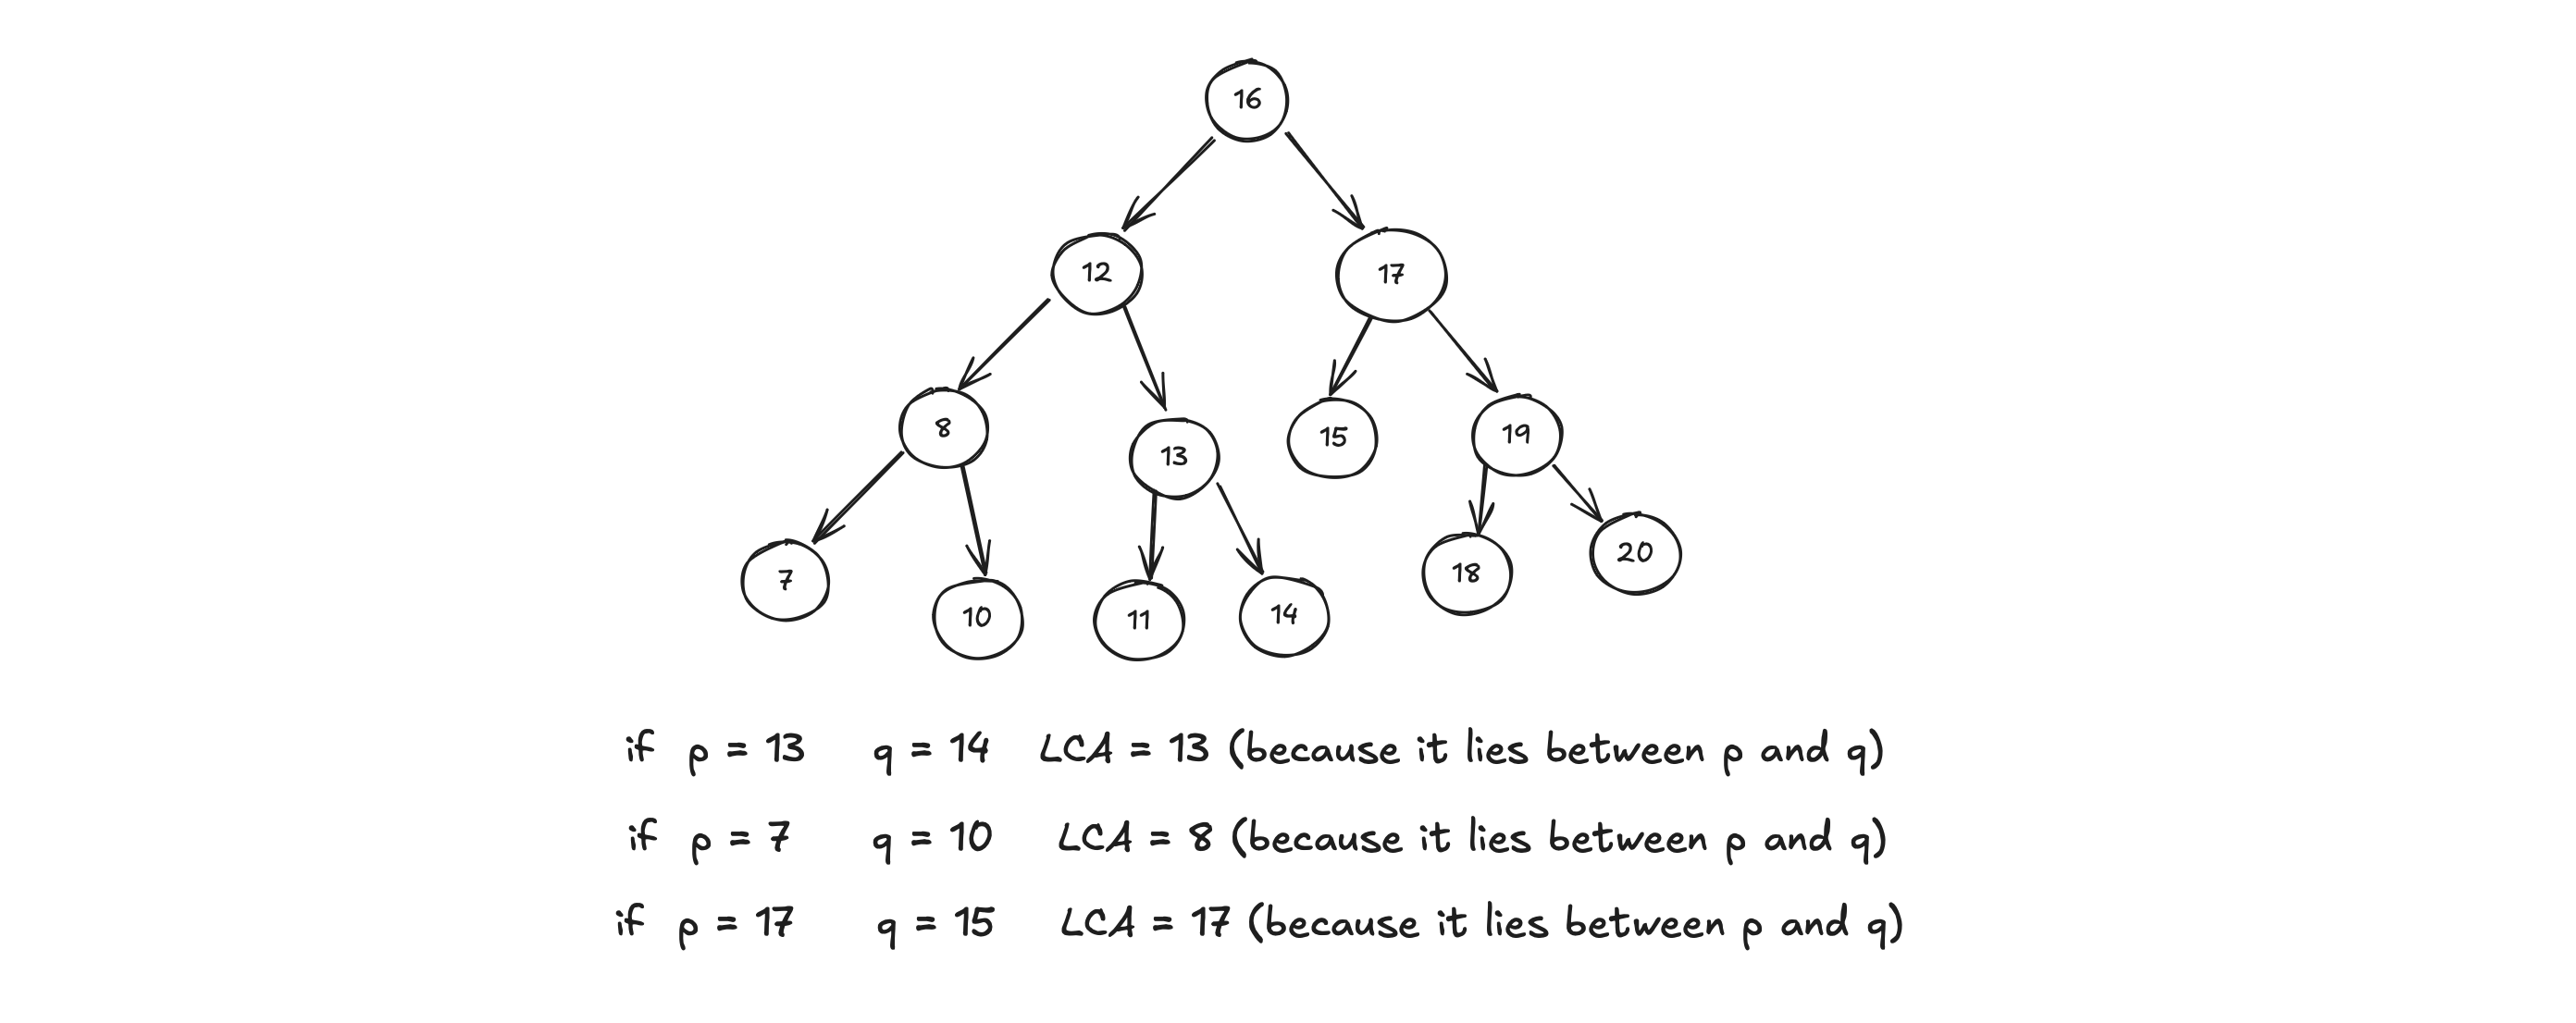

The goal of the algorithm is to find this LCA.

And there are only two cases to consider during the search:

1. **Both `p` and `q` Are Greater Than the Current Node:**

If the current node value is less than both `p` and `q`, it means the LCA must be further down in the right subtree. Therefore, we move to the right child because all the values in the right subtree are greater than the current node, which brings us closer to `p` and `q`.

2. **Both `p` and `q` Are Less Than the Current Node:**

If the current node value is greater than both `p` and `q`, the LCA must be located in the left subtree, so we move to the left child because all the values in the left subtree are smaller than the current node, which brings us closer to `p` and `q`.

If the current node's value lies between `p` and `q`, or matches one of them, then that node is the LCA.

## Key Challenges:

1. **Identifying the LCA:** 

Initially, I thought that the LCA must be the node whose left and right children match `p` and `q`. However, this is incorrect because `p` and `q` can also be descendants of themselves. There are cases where the current node can be equal to either `p` or `q`. To handle this properly, I needed to revise my understanding of the LCA. Eventually, I realized that the LCA is the node whose value lies between `p` and `q` (inclusive). 

However, there's a catch: there's no guarantee that `p` is always smaller than `q`, as `p` can sometimes be greater than `q`.

To address this, I adjusted the condition so that it doesn’t rely on the relative order of `p` and `q`. Instead, I used the condition `min(p.val, q.val) <= current.val <= max(p.val, q.val)` to determine if the current node lies between `p` and `q`. This approach ensures that regardless of the order, we correctly identify the **LCA** by checking whether the current node’s value falls in the range defined by `p` and `q`.

Furthermore, if the current node’s value is less than both `p` and `q`, it means the **LCA** must be in the right subtree, as both `p` and `q` would be greater. Conversely, if the current node’s value is greater than both `p` and `q`, the **LCA** must be in the left subtree, since both `p` and `q` are smaller. This recursive check allows us to efficiently navigate the **BST** and locate the **LCA** without ambiguity.

## Solution:

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':

        # initialize current to root
        current = root

        # continue if current is not empty
        while current:

            # check if current node lies betweent p and q (if current node is a valid ancestor of p and q)
            if min(p.val, q.val) <= current.val <= max(p.val, q.val):
                # break since we've found the LCA
                break 

            # check if the current node is less than p and q
            elif current.val < p.val and current.val < q.val:
                
                # move to the right child of the current node (to find a bigger value)
                current = current.right
            
            # check if the current node is greater than p and q
            elif current.val > p.val and current.val > q.val:

                #  move to the left child of the current node (to find a smaller value)
                current = current.left

        # return the LCA node
        return current               

## Alternative Solution:

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, x):
#         self.val = x
#         self.left = None
#         self.right = None

class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':

        # initialize current to root
        current = root

        # continue if current is not empty
        while current:

            # check if the current node is less than p and q
            if current.val < p.val and current.val < q.val:
                # move to the right child of the current node (to find a bigger value)
                current = current.right
            
            # check if the current node is greater than p and q
            elif current.val > p.val and current.val > q.val:
                # move to the left child of the current node (to find a smaller value)
                current = current.left

            # else current node must lie betweent p and q (we've found the LCA)
            else:
                break

        # return the LCA node
        return current               